In [57]:
import pandas
pandas.options.display.max_columns=999

import sbmlcore

The below needs to be either `'validation'` or `'traintest'`

In [58]:
filestem = 'traintest'

In [59]:
df2 = pandas.read_csv('data/ds-' + filestem+'-phen.csv')
df2.rename(columns={'MUTATION':'mutation', 'CONSISTENT_PHENOTYPE':'phenotype'}, inplace=True)
df2[:3]


,mutation,phenotype
0,A102V,S
1,A134D,S
2,A134P,R


In [60]:
dataset = sbmlcore.FeatureDataset(df2, species='M. tuberculosis', gene='pncA')
dataset.df['segid'] = 'A'
dataset.df[:3]

,mutation,phenotype,segid
0,A102V,S,A
1,A134D,S,A
2,A134P,R,A


### add change in amino acid sidechain volume

In [61]:
features = [sbmlcore.AminoAcidVolumeChange(), sbmlcore.AminoAcidHydropathyChangeKyteDoolittle(), sbmlcore.AminoAcidPiChange(), sbmlcore.AminoAcidMWChange(), sbmlcore.AminoAcidRogovChange()]
dataset.add_feature(features)
dataset.df[:3]

,mutation,phenotype,segid,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov
0,A134D,S,A,22.5,-5.3,-3.23,44.0,0.029
1,A143D,R,A,22.5,-5.3,-3.23,44.0,0.029
2,A165D,R,A,22.5,-5.3,-3.23,44.0,0.029


### add features measured using STRIDE

In [62]:
dataset = dataset + sbmlcore.Stride('./data/reference/3PL1-PZA.pdb')
dataset.df['secondary_structure_codes'] = pandas.Categorical(dataset.df.secondary_structure, categories=dataset.df.secondary_structure.unique()).codes
dataset.df.drop(columns=['secondary_structure', 'secondary_structure_long', 'B', 'C', 'E', 'G', 'H', 'T'], inplace=True)
dataset.df[:3]

,segid,mutation,phenotype,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes
0,A,A3E,R,49.8,-5.3,-2.78,58.0,-0.033,-126.53,153.85,0.0,1.0,1.0,0
1,A,A3S,S,0.4,-2.6,-0.32,16.0,0.249,-126.53,153.85,0.0,1.0,1.0,0
2,A,A3V,S,51.4,2.4,-0.04,28.0,0.232,-126.53,153.85,0.0,1.0,1.0,0


In [63]:
dataset = dataset + sbmlcore.TempFactors('data/reference/3PL1-PZA.pdb')
dataset.df[:5]

/Users/fowler/Library/Python/3.10/lib/python/site-packages/MDAnalysis/topology/PDBParser.py:334: UserWarning: Unknown element  found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/Users/fowler/Library/Python/3.10/lib/python/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: 
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


,segid,mutation,phenotype,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor
0,A,M1L,R,3.8,1.9,0.24,-18.0,-0.389,0.00,-35.20,86.2,2.0,0.0,4,59.720001
1,A,M1T,R,-46.8,-2.6,-0.14,-30.1,-0.548,0.00,-35.20,86.2,2.0,0.0,4,59.720001
2,A,M1V,S,-22.9,2.3,0.22,-32.1,-0.514,0.00,-35.20,86.2,2.0,0.0,4,59.720001
3,A,R2Q,S,-29.6,1.0,-5.11,-28.0,0.375,-117.94,133.99,54.7,2.0,0.0,0,53.990002
4,A,A3E,R,49.8,-5.3,-2.78,58.0,-0.033,-126.53,153.85,0.0,1.0,1.0,0,43.310001


<AxesSubplot:>

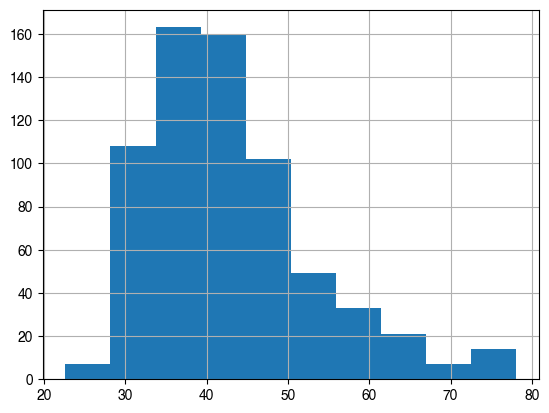

In [64]:
dataset.df.temp_factor.hist()

### add residue depth as measured by BioPython

In [39]:
dataset = dataset + sbmlcore.ResidueDepth('data/reference/3PL1-PZA.pdb', segids=['A'])
dataset.df[:3]

/Users/fowler/Library/Python/3.10/lib/python/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C6) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/fowler/Library/Python/3.10/lib/python/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'H' for Atom (name=H6) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/fowler/Library/Python/3.10/lib/python/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N5) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/fowler/Library/Python/3.10/lib/python/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C4) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/fowler/Library/Python/3.10/lib/python/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'H' for Atom (name=H4) with given element ''
  warnings

,segid,mutation,phenotype,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth
0,A,M1L,R,3.8,1.9,0.24,-18.0,-0.389,0.0,-35.2,86.2,2.0,0.0,4,59.720001,2.103049
1,A,M1T,R,-46.8,-2.6,-0.14,-30.1,-0.548,0.0,-35.2,86.2,2.0,0.0,4,59.720001,2.103049
2,A,M1V,S,-22.9,2.3,0.22,-32.1,-0.514,0.0,-35.2,86.2,2.0,0.0,4,59.720001,2.103049


### add effect on protein stability as estimated by DeepDDG

In [40]:
dataset = dataset + sbmlcore.DeepDDG('./data/features/3pl1.ddg')
dataset.df.deep_ddG.fillna(value=0, inplace=True)
dataset.df[:3]

,segid,mutation,phenotype,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth,deep_ddG
0,A,M1L,R,3.8,1.9,0.24,-18.0,-0.389,0.0,-35.2,86.2,2.0,0.0,4,59.720001,2.103049,-0.770
1,A,M1T,R,-46.8,-2.6,-0.14,-30.1,-0.548,0.0,-35.2,86.2,2.0,0.0,4,59.720001,2.103049,-1.096
2,A,M1V,S,-22.9,2.3,0.22,-32.1,-0.514,0.0,-35.2,86.2,2.0,0.0,4,59.720001,2.103049,-0.908


Most mutations are predicted to be destabilising as expected

<AxesSubplot:>

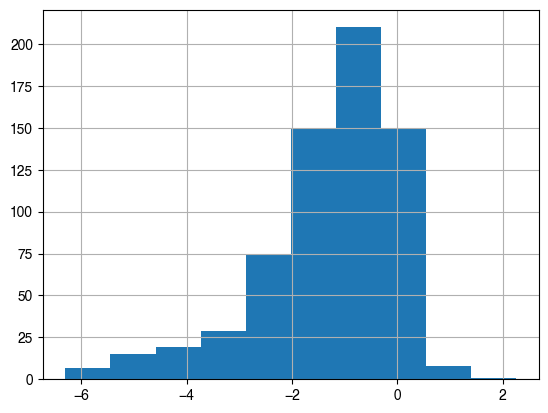

In [41]:
dataset.df.deep_ddG.hist()

### add effect on protein stability estimated by RaSP

<AxesSubplot:>

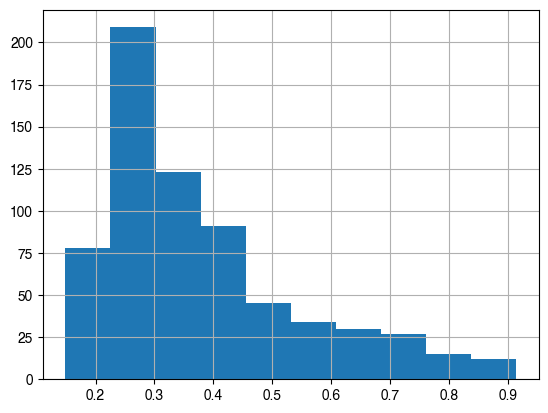

In [42]:
# a = sbmlcore.RaSP('data/features/cavity_pred_3PL1_A.csv')
# a.results.rasp_score_ml.hist()
dataset = dataset + sbmlcore.RaSP('data/features/cavity_pred_3PL1_A.csv')
dataset.df.drop(columns=['rasp_score_ml'], inplace=True)
dataset.df.rasp_score_ml_fermi.hist()

In [43]:
dataset = dataset + sbmlcore.SNAP2('./data/features/3pl1-snap2-with-segids.csv', offsets={'A': 0})
dataset.df.drop(columns=['snap2_accuracy'], inplace=True)
dataset.df[:3]

,segid,mutation,phenotype,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth,deep_ddG,rasp_wt_nlf,rasp_mt_nlf,rasp_score_ml_fermi,snap2_score
0,A,M1L,R,3.8,1.9,0.24,-18.0,-0.389,0.0,-35.2,86.2,2.0,0.0,4,59.720001,2.103049,-0.770,3.785957,2.433114,0.223921,20
1,A,M1T,R,-46.8,-2.6,-0.14,-30.1,-0.548,0.0,-35.2,86.2,2.0,0.0,4,59.720001,2.103049,-1.096,3.785957,2.896883,0.281366,52
2,A,M1V,S,-22.9,2.3,0.22,-32.1,-0.514,0.0,-35.2,86.2,2.0,0.0,4,59.720001,2.103049,-0.908,3.785957,2.623741,0.258386,4


### add distance from the catalytic Iron 

In [44]:
dataset = dataset + sbmlcore.StructuralDistances('data/reference/3PL1-PZA.pdb', 'resname FE2', 'dist_FE2')
dataset.df[:3]

/Users/fowler/Library/Python/3.10/lib/python/site-packages/MDAnalysis/topology/PDBParser.py:334: UserWarning: Unknown element  found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/Users/fowler/Library/Python/3.10/lib/python/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: 
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


,segid,mutation,phenotype,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth,deep_ddG,rasp_wt_nlf,rasp_mt_nlf,rasp_score_ml_fermi,snap2_score,dist_FE2
0,A,M1L,R,3.8,1.9,0.24,-18.0,-0.389,0.0,-35.2,86.2,2.0,0.0,4,59.720001,2.103049,-0.770,3.785957,2.433114,0.223921,20,29.948318
1,A,M1T,R,-46.8,-2.6,-0.14,-30.1,-0.548,0.0,-35.2,86.2,2.0,0.0,4,59.720001,2.103049,-1.096,3.785957,2.896883,0.281366,52,29.948318
2,A,M1V,S,-22.9,2.3,0.22,-32.1,-0.514,0.0,-35.2,86.2,2.0,0.0,4,59.720001,2.103049,-0.908,3.785957,2.623741,0.258386,4,29.948318


### add distance from the bound pyrazinamide

In [45]:
dataset = dataset + sbmlcore.StructuralDistances('data/reference/3PL1-PZA.pdb', 'resname PZA', 'dist_PZA', infer_masses=False)


/Users/fowler/Library/Python/3.10/lib/python/site-packages/MDAnalysis/topology/PDBParser.py:334: UserWarning: Unknown element  found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/Users/fowler/Library/Python/3.10/lib/python/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: 
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


In [46]:
dataset.df

,segid,mutation,phenotype,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth,deep_ddG,rasp_wt_nlf,rasp_mt_nlf,rasp_score_ml_fermi,snap2_score,dist_FE2,dist_PZA
0,A,M1L,R,3.8,1.9,0.24,-18.0,-0.389,0.00,-35.20,86.2,2.0,0.0,4,59.720001,2.103049,-0.770,3.785957,2.433114,0.223921,20,29.948318,27.641663
1,A,M1T,R,-46.8,-2.6,-0.14,-30.1,-0.548,0.00,-35.20,86.2,2.0,0.0,4,59.720001,2.103049,-1.096,3.785957,2.896883,0.281366,52,29.948318,27.641663
2,A,M1V,S,-22.9,2.3,0.22,-32.1,-0.514,0.00,-35.20,86.2,2.0,0.0,4,59.720001,2.103049,-0.908,3.785957,2.623741,0.258386,4,29.948318,27.641663
3,A,R2Q,S,-29.6,1.0,-5.11,-28.0,0.375,-117.94,133.99,54.7,2.0,0.0,0,53.990002,2.372958,-1.144,3.035567,3.338515,0.331465,-26,27.459823,24.722696
4,A,A3E,R,49.8,-5.3,-2.78,58.0,-0.033,-126.53,153.85,0.0,1.0,1.0,0,43.310001,5.503930,-5.340,2.483982,2.712832,0.554393,56,24.149025,21.557456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,A,S185G,S,-28.9,0.4,0.29,-30.0,0.120,-73.76,0.00,67.6,0.0,0.0,4,53.709999,1.798143,-0.900,2.844502,2.560213,0.273806,69,27.305858,22.750537
660,A,S185I,S,77.7,5.3,0.34,26.1,-0.026,-73.76,0.00,67.6,0.0,0.0,4,53.709999,1.798143,0.128,2.844502,2.854018,0.215031,62,27.305858,22.750537
661,A,S185N,S,25.1,-2.7,-0.27,27.0,0.271,-73.76,0.00,67.6,0.0,0.0,4,53.709999,1.798143,-1.120,2.844502,3.127102,0.229262,53,27.305858,22.750537
662,A,S185R,S,84.4,-3.7,5.08,69.1,0.127,-73.76,0.00,67.6,0.0,0.0,4,53.709999,1.798143,-0.811,2.844502,3.035567,0.274627,67,27.305858,22.750537


### add mCSM predicted stability scores

In [47]:
 # add mCSM stability
df = pandas.read_csv('data/features/3pl1-mcsm_stability.txt', sep='\t')

def create_mutation(row):
    return row['WILD_RES']+str(row.RES_POS)+row['MUT_RES']

df['mutation'] = df.apply(create_mutation, axis=1)
df = df[['mutation','RSA','PRED_DDG']]
df.rename(columns={'RSA': 'mcsm_stability_rsa', 'PRED_DDG': 'mcsm_stability_ddG'}, inplace=True)
df.set_index('mutation', inplace=True)
df
dataset.df.set_index('mutation', inplace=True)
dataset.df = dataset.df.join(df,how='left')
dataset.df.reset_index(inplace=True)
dataset.df

,mutation,segid,phenotype,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth,deep_ddG,rasp_wt_nlf,rasp_mt_nlf,rasp_score_ml_fermi,snap2_score,dist_FE2,dist_PZA,mcsm_stability_rsa,mcsm_stability_ddG
0,M1L,A,R,3.8,1.9,0.24,-18.0,-0.389,0.00,-35.20,86.2,2.0,0.0,4,59.720001,2.103049,-0.770,3.785957,2.433114,0.223921,20,29.948318,27.641663,54.8,-0.771
1,M1T,A,R,-46.8,-2.6,-0.14,-30.1,-0.548,0.00,-35.20,86.2,2.0,0.0,4,59.720001,2.103049,-1.096,3.785957,2.896883,0.281366,52,29.948318,27.641663,54.8,-0.367
2,M1V,A,S,-22.9,2.3,0.22,-32.1,-0.514,0.00,-35.20,86.2,2.0,0.0,4,59.720001,2.103049,-0.908,3.785957,2.623741,0.258386,4,29.948318,27.641663,54.8,-0.912
3,R2Q,A,S,-29.6,1.0,-5.11,-28.0,0.375,-117.94,133.99,54.7,2.0,0.0,0,53.990002,2.372958,-1.144,3.035567,3.338515,0.331465,-26,27.459823,24.722696,27.5,-0.790
4,A3E,A,R,49.8,-5.3,-2.78,58.0,-0.033,-126.53,153.85,0.0,1.0,1.0,0,43.310001,5.503930,-5.340,2.483982,2.712832,0.554393,56,24.149025,21.557456,0.0,-2.528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,S185G,A,S,-28.9,0.4,0.29,-30.0,0.120,-73.76,0.00,67.6,0.0,0.0,4,53.709999,1.798143,-0.900,2.844502,2.560213,0.273806,69,27.305858,22.750537,12.8,-0.597
660,S185I,A,S,77.7,5.3,0.34,26.1,-0.026,-73.76,0.00,67.6,0.0,0.0,4,53.709999,1.798143,0.128,2.844502,2.854018,0.215031,62,27.305858,22.750537,12.8,-0.234
661,S185N,A,S,25.1,-2.7,-0.27,27.0,0.271,-73.76,0.00,67.6,0.0,0.0,4,53.709999,1.798143,-1.120,2.844502,3.127102,0.229262,53,27.305858,22.750537,12.8,-0.277
662,S185R,A,S,84.4,-3.7,5.08,69.1,0.127,-73.76,0.00,67.6,0.0,0.0,4,53.709999,1.798143,-0.811,2.844502,3.035567,0.274627,67,27.305858,22.750537,12.8,-0.124


In [48]:
df = pandas.read_csv('data/features/3pl1-mapp_scores.csv')
df2 = pandas.melt(df, id_vars='Position',value_vars=['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'])
df2.rename(columns={'Position': 'codon', 'variable': 'alt_amino_acid', 'value': 'mapp_score'}, inplace=True)
df2.set_index(['codon', 'alt_amino_acid'], inplace=True)

def split_mutation(row):
    return pandas.Series([int(row.mutation[1:-1]), row.mutation[-1]])

df2

dataset.df[['codon', 'alt_amino_acid']] = dataset.df.apply(split_mutation, axis=1)
dataset.df.set_index(['codon', 'alt_amino_acid'], inplace=True)
dataset.df = dataset.df.join(df2,how='left')
dataset.df.reset_index(inplace=True)
dataset.df.drop(columns=['codon', 'alt_amino_acid'], inplace=True)
dataset.df


,mutation,segid,phenotype,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth,deep_ddG,rasp_wt_nlf,rasp_mt_nlf,rasp_score_ml_fermi,snap2_score,dist_FE2,dist_PZA,mcsm_stability_rsa,mcsm_stability_ddG,mapp_score
0,M1L,A,R,3.8,1.9,0.24,-18.0,-0.389,0.00,-35.20,86.2,2.0,0.0,4,59.720001,2.103049,-0.770,3.785957,2.433114,0.223921,20,29.948318,27.641663,54.8,-0.771,13.49
1,M1T,A,R,-46.8,-2.6,-0.14,-30.1,-0.548,0.00,-35.20,86.2,2.0,0.0,4,59.720001,2.103049,-1.096,3.785957,2.896883,0.281366,52,29.948318,27.641663,54.8,-0.367,25.97
2,M1V,A,S,-22.9,2.3,0.22,-32.1,-0.514,0.00,-35.20,86.2,2.0,0.0,4,59.720001,2.103049,-0.908,3.785957,2.623741,0.258386,4,29.948318,27.641663,54.8,-0.912,30.01
3,R2Q,A,S,-29.6,1.0,-5.11,-28.0,0.375,-117.94,133.99,54.7,2.0,0.0,0,53.990002,2.372958,-1.144,3.035567,3.338515,0.331465,-26,27.459823,24.722696,27.5,-0.790,2.68
4,A3E,A,R,49.8,-5.3,-2.78,58.0,-0.033,-126.53,153.85,0.0,1.0,1.0,0,43.310001,5.503930,-5.340,2.483982,2.712832,0.554393,56,24.149025,21.557456,0.0,-2.528,35.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,S185G,A,S,-28.9,0.4,0.29,-30.0,0.120,-73.76,0.00,67.6,0.0,0.0,4,53.709999,1.798143,-0.900,2.844502,2.560213,0.273806,69,27.305858,22.750537,12.8,-0.597,3.20
660,S185I,A,S,77.7,5.3,0.34,26.1,-0.026,-73.76,0.00,67.6,0.0,0.0,4,53.709999,1.798143,0.128,2.844502,2.854018,0.215031,62,27.305858,22.750537,12.8,-0.234,2.82
661,S185N,A,S,25.1,-2.7,-0.27,27.0,0.271,-73.76,0.00,67.6,0.0,0.0,4,53.709999,1.798143,-1.120,2.844502,3.127102,0.229262,53,27.305858,22.750537,12.8,-0.277,1.51
662,S185R,A,S,84.4,-3.7,5.08,69.1,0.127,-73.76,0.00,67.6,0.0,0.0,4,53.709999,1.798143,-0.811,2.844502,3.035567,0.274627,67,27.305858,22.750537,12.8,-0.124,2.78


In [49]:
dataset.df.phenotype.value_counts()

R    349
S    315
Name: phenotype, dtype: int64

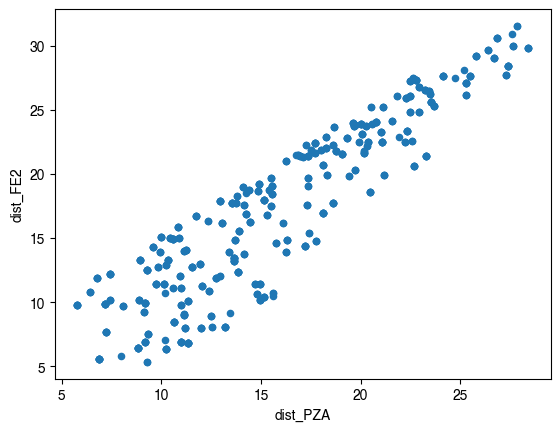

In [50]:
axes = dataset.df.plot.scatter(x='dist_PZA', y='dist_FE2')

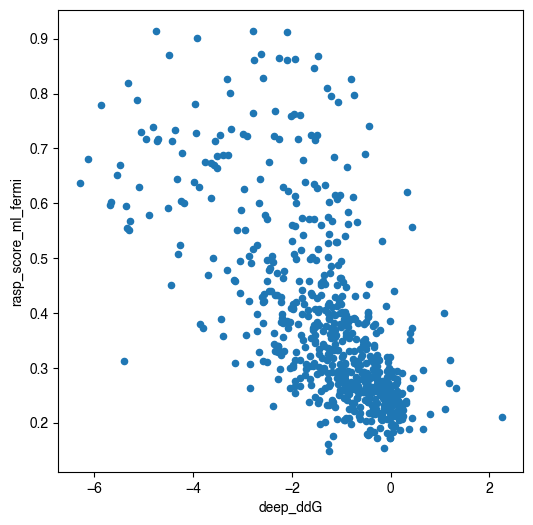

In [51]:
axes = dataset.df.plot.scatter(x='deep_ddG', y='rasp_score_ml_fermi', figsize=(6,6))

In [52]:
axes.get_figure().savefig('foo.pdf')

In [53]:
dataset.df.to_csv('data/ds-'+filestem+'-phen-features.csv', index=False)

In [54]:
dataset.df.set_index('mutation', inplace=True)

In [55]:
dataset.df

,segid,phenotype,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth,deep_ddG,rasp_wt_nlf,rasp_mt_nlf,rasp_score_ml_fermi,snap2_score,dist_FE2,dist_PZA,mcsm_stability_rsa,mcsm_stability_ddG,mapp_score
mutation,,,,,,,,,,,,,,,,,,,,,,,,,
M1L,A,R,3.8,1.9,0.24,-18.0,-0.389,0.00,-35.20,86.2,2.0,0.0,4,59.720001,2.103049,-0.770,3.785957,2.433114,0.223921,20,29.948318,27.641663,54.8,-0.771,13.49
M1T,A,R,-46.8,-2.6,-0.14,-30.1,-0.548,0.00,-35.20,86.2,2.0,0.0,4,59.720001,2.103049,-1.096,3.785957,2.896883,0.281366,52,29.948318,27.641663,54.8,-0.367,25.97
M1V,A,S,-22.9,2.3,0.22,-32.1,-0.514,0.00,-35.20,86.2,2.0,0.0,4,59.720001,2.103049,-0.908,3.785957,2.623741,0.258386,4,29.948318,27.641663,54.8,-0.912,30.01
R2Q,A,S,-29.6,1.0,-5.11,-28.0,0.375,-117.94,133.99,54.7,2.0,0.0,0,53.990002,2.372958,-1.144,3.035567,3.338515,0.331465,-26,27.459823,24.722696,27.5,-0.790,2.68
A3E,A,R,49.8,-5.3,-2.78,58.0,-0.033,-126.53,153.85,0.0,1.0,1.0,0,43.310001,5.503930,-5.340,2.483982,2.712832,0.554393,56,24.149025,21.557456,0.0,-2.528,35.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S185G,A,S,-28.9,0.4,0.29,-30.0,0.120,-73.76,0.00,67.6,0.0,0.0,4,53.709999,1.798143,-0.900,2.844502,2.560213,0.273806,69,27.305858,22.750537,12.8,-0.597,3.20
S185I,A,S,77.7,5.3,0.34,26.1,-0.026,-73.76,0.00,67.6,0.0,0.0,4,53.709999,1.798143,0.128,2.844502,2.854018,0.215031,62,27.305858,22.750537,12.8,-0.234,2.82
S185N,A,S,25.1,-2.7,-0.27,27.0,0.271,-73.76,0.00,67.6,0.0,0.0,4,53.709999,1.798143,-1.120,2.844502,3.127102,0.229262,53,27.305858,22.750537,12.8,-0.277,1.51
